1. Intensity Transformation

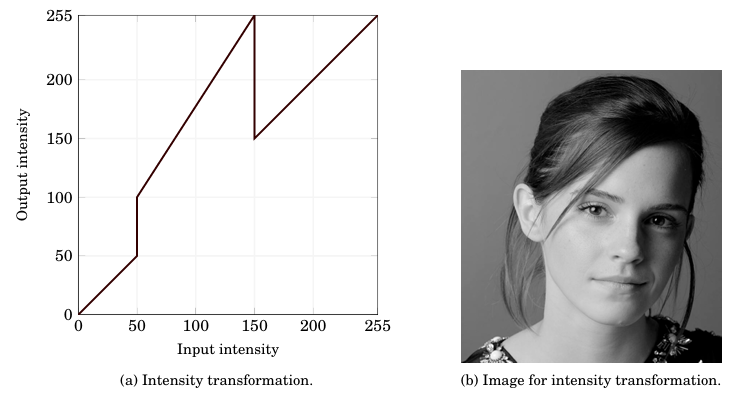

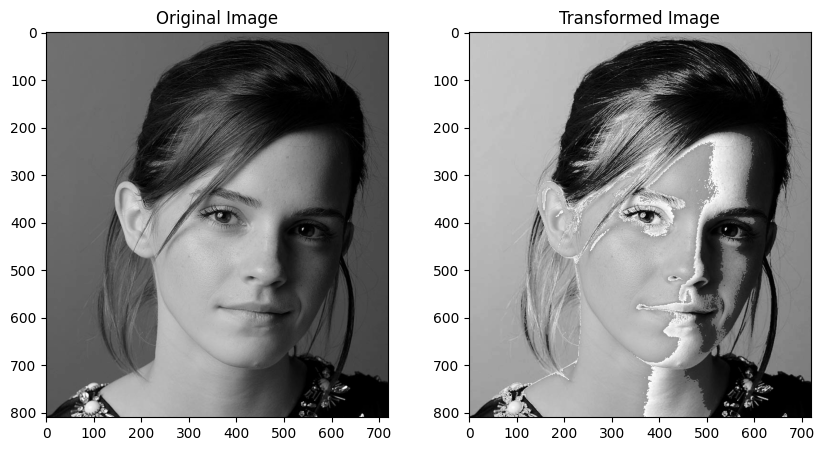

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread('a1images\\emma.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None

# intensity transformation
def intensity_transform(pixel):
    if 0 <= pixel < 50:
        return int(pixel)
    elif 50 <= pixel < 150:
        return int(1.55 * pixel + 22.5)
    elif 150 <= pixel < 255:
        return int(pixel)
    else:
        return 0
    
    

# Vectorize the transformation function
vectorized_transform = np.vectorize(intensity_transform)

# Apply the transformation
transformed_image = vectorized_transform(img)

# Display the original and transformed images
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(1,2,2)
plt.title('Transformed Image')
plt.imshow(transformed_image, cmap='gray')

plt.show()



2. Identify Brain density


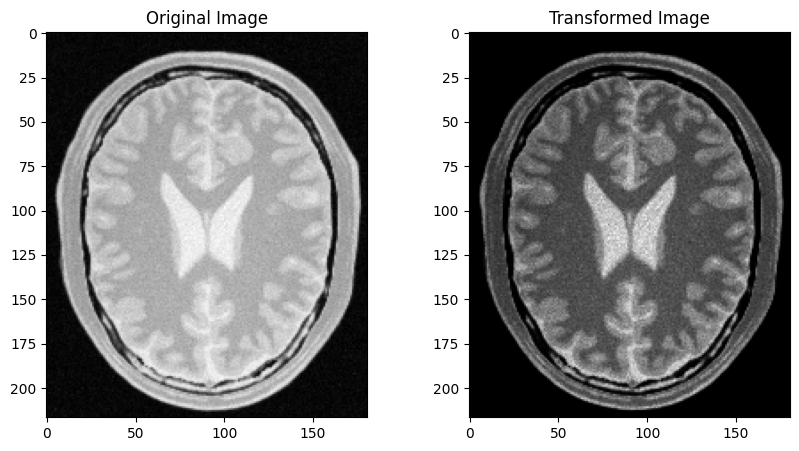

In [7]:
# open the brain_proton_density_slice.png image

img = cv.imread('a1images\\brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert img is not None

# intensity transformation and identify the white matter and gray matter in the cell

# apply gamma correction
def gamma_correction(pixel, gamma):
    return int(255 * (pixel / 255) ** gamma)

# Vectorize the transformation function
vectorized_transform = np.vectorize(gamma_correction)

# Apply the transformation
transformed_image = vectorized_transform(img, 3)


# Display the original and transformed images
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(1,2,2)
plt.title('Transformed Image')
plt.imshow(transformed_image, cmap='gray')

plt.show()

# Identify the white matter and gray matter in the cell

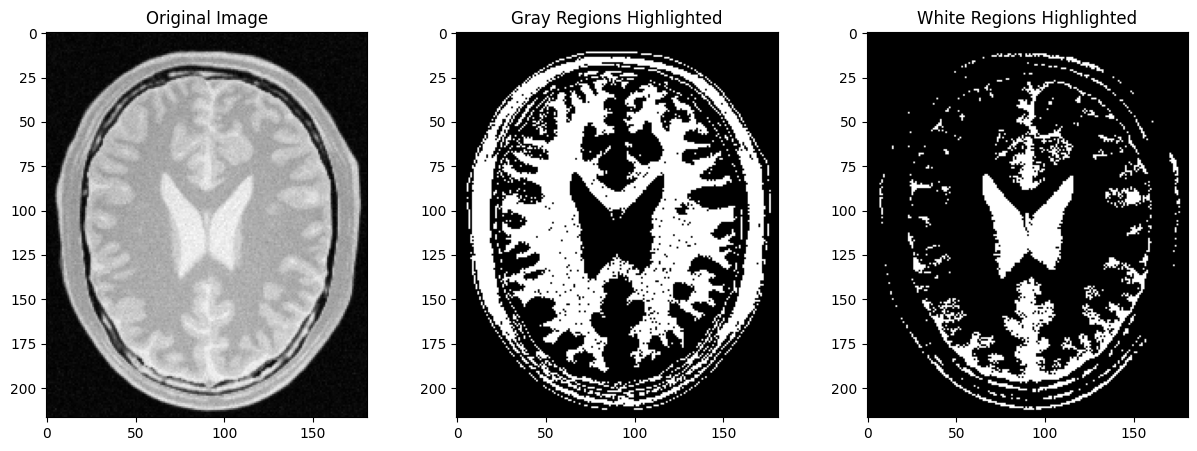

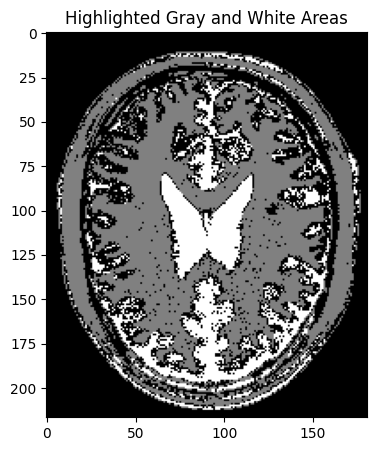

In [8]:
# Highlight gray region (Intensity range: 100-180)
gray_mask = cv.inRange(img, 100, 180)

# Highlight white region (Intensity range: 200-255)
white_mask = cv.inRange(img, 200, 255)

# Create a highlighted image with different colors for gray and white
highlighted_image = np.zeros_like(img)
highlighted_image[gray_mask > 0] = 128  # Set gray regions to a lighter shade
highlighted_image[white_mask > 0] = 255  # Set white regions to full intensity (white)

plt.figure(figsize=(15,5))

plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')

plt.subplot(1, 3, 2)
plt.title('Gray Regions Highlighted')
plt.imshow(gray_mask, cmap='gray')

plt.subplot(1, 3, 3)
plt.title('White Regions Highlighted')
plt.imshow(white_mask, cmap='gray')

plt.show()

# Combine both masks and display the highlighted image
plt.figure(figsize=(10, 5))
plt.title('Highlighted Gray and White Areas')
plt.imshow(highlighted_image, cmap='gray')
plt.show()

3. Gamma Correction

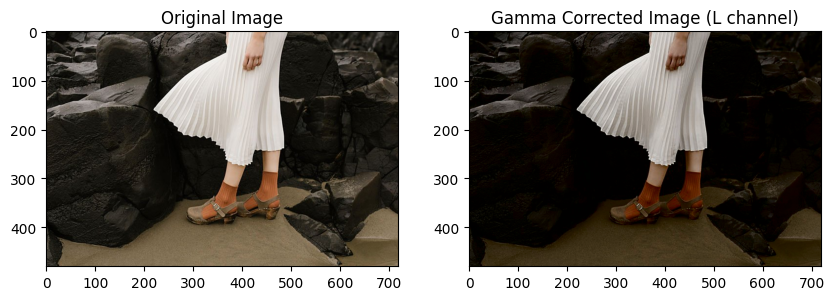

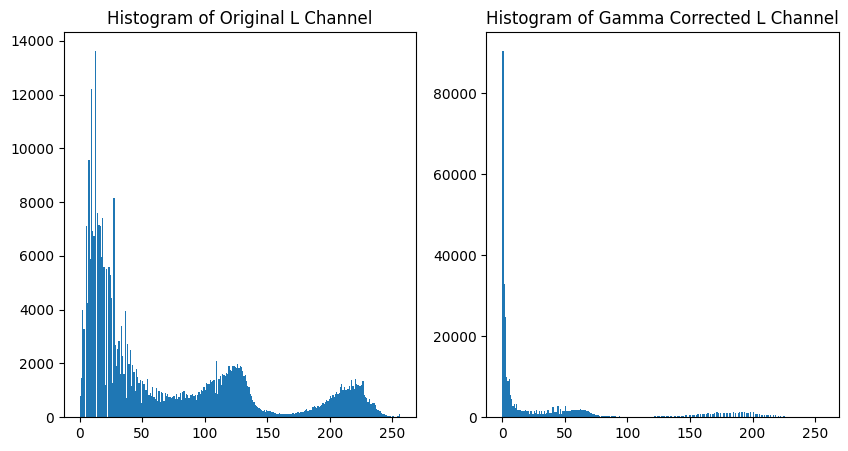

In [3]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv.imread('a1images\\highlights_and_shadows.jpg')  # Replace with the correct image path
assert img is not None

# Convert the image from BGR to Lab color space
lab_image = cv.cvtColor(img, cv.COLOR_BGR2Lab)

# Split the channels
L, a, b = cv.split(lab_image)

# Normalize the L channel to [0,1] for gamma correction
L_normalized = L / 255.0

# Gamma correction function
gamma = 2  # You can change the gamma value as needed
L_gamma_corrected = np.power(L_normalized, gamma)

# Scale back to [0, 255]
L_gamma_corrected = np.uint8(L_gamma_corrected * 255)

# Merge the corrected L channel back with original a and b channels
lab_corrected = cv.merge((L_gamma_corrected, a, b))

# Convert back to BGR color space for visualization
corrected_img = cv.cvtColor(lab_corrected, cv.COLOR_Lab2BGR)

# Display the original and corrected images
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))  # Convert to RGB for display

plt.subplot(1, 2, 2)
plt.title('Gamma Corrected Image (L channel)')
plt.imshow(cv.cvtColor(corrected_img, cv.COLOR_BGR2RGB))  # Convert to RGB for display

plt.show()

# Plot the histograms of original and corrected L channels
plt.figure(figsize=(10,5))

# Histogram of the original L channel
plt.subplot(1, 2, 1)
plt.hist(L.ravel(), bins=256, range=[0, 256])
plt.title('Histogram of Original L Channel')

# Histogram of the gamma corrected L channel
plt.subplot(1, 2, 2)
plt.hist(L_gamma_corrected.ravel(), bins=256, range=[0, 256])
plt.title('Histogram of Gamma Corrected L Channel')

plt.show()


4.

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Raveen\AppData\Local\Temp\ipykernel_25440\3085827559.py:2: SyntaxWarning: invalid escape sequence '\s'
  img = cv.imread('a1images\spider.png')  # Replace with your image path


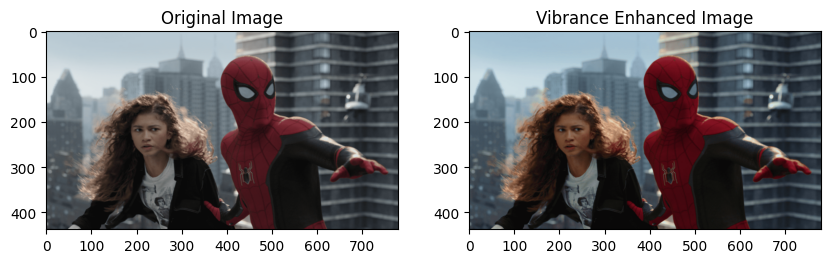

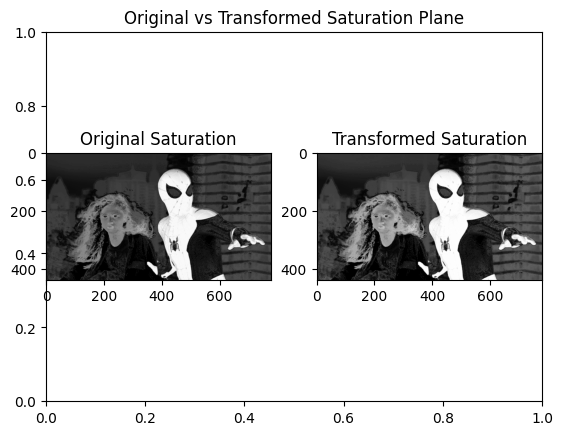

In [4]:
# Load the image
img = cv.imread('a1images\spider.png')  # Replace with your image path
assert img is not None

# Convert the image to HSV color space
hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# Split the HSV channels
H, S, V = cv.split(hsv_img)

# Function to apply the intensity transformation to the saturation plane
def intensity_transformation(x, a=0.5, sigma=70):
    x = x.astype(np.float32)
    transformed = x + a * 128 * np.exp(-((x - 128) ** 2) / (2 * (sigma ** 2)))
    transformed = np.minimum(transformed, 255)  # Clip to 255
    return transformed.astype(np.uint8)

# Apply the intensity transformation to the saturation channel
a = 0.5  # Adjust this value to get a visually pleasing result
S_transformed = intensity_transformation(S, a=a)

# Recombine the HSV channels with the modified saturation plane
hsv_transformed = cv.merge([H, S_transformed, V])

# Convert the transformed HSV image back to BGR color space for visualization
vibrance_enhanced_img = cv.cvtColor(hsv_transformed, cv.COLOR_HSV2BGR)

# Display the original and vibrance-enhanced images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))  # Convert to RGB for display

plt.subplot(1, 2, 2)
plt.title('Vibrance Enhanced Image')
plt.imshow(cv.cvtColor(vibrance_enhanced_img, cv.COLOR_BGR2RGB))  # Convert to RGB for display

plt.show()

# Display the intensity transformation applied to the saturation channel
plt.figure()
plt.title('Original vs Transformed Saturation Plane')
plt.subplot(1, 2, 1)
plt.title('Original Saturation')
plt.imshow(S, cmap='gray')
plt.subplot(1, 2, 2)
plt.title('Transformed Saturation')
plt.imshow(S_transformed, cmap='gray')
plt.show()


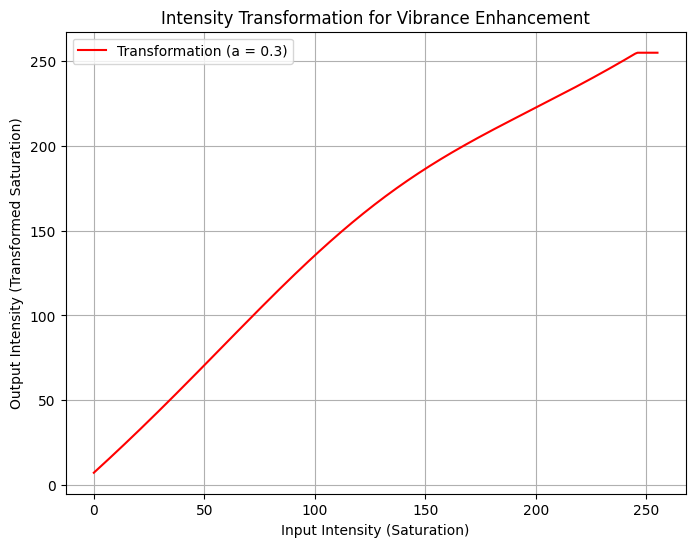

In [5]:
# Create input intensity values (range of possible saturation values)
x_values = np.arange(0, 256, 1, dtype=np.float32)

# Apply the vibrance enhancement transformation for the intensity values
sigma = 70
a = 0.3  # Amplification factor
transformation_values = x_values + a * 128 * np.exp(-((x_values - 128) ** 2) / (2 * sigma ** 2))
transformation_values = np.clip(transformation_values, 0, 255)  # Clip values to the range [0, 255]

# Plot the original intensity vs the transformed intensity
plt.figure(figsize=(8, 6))
plt.plot(x_values, transformation_values, color='r', label=f'Transformation (a = {a})')
plt.xlabel('Input Intensity (Saturation)')
plt.ylabel('Output Intensity (Transformed Saturation)')
plt.title('Intensity Transformation for Vibrance Enhancement')
plt.grid(True)
plt.legend()
plt.show()

5. Histogram Equalization

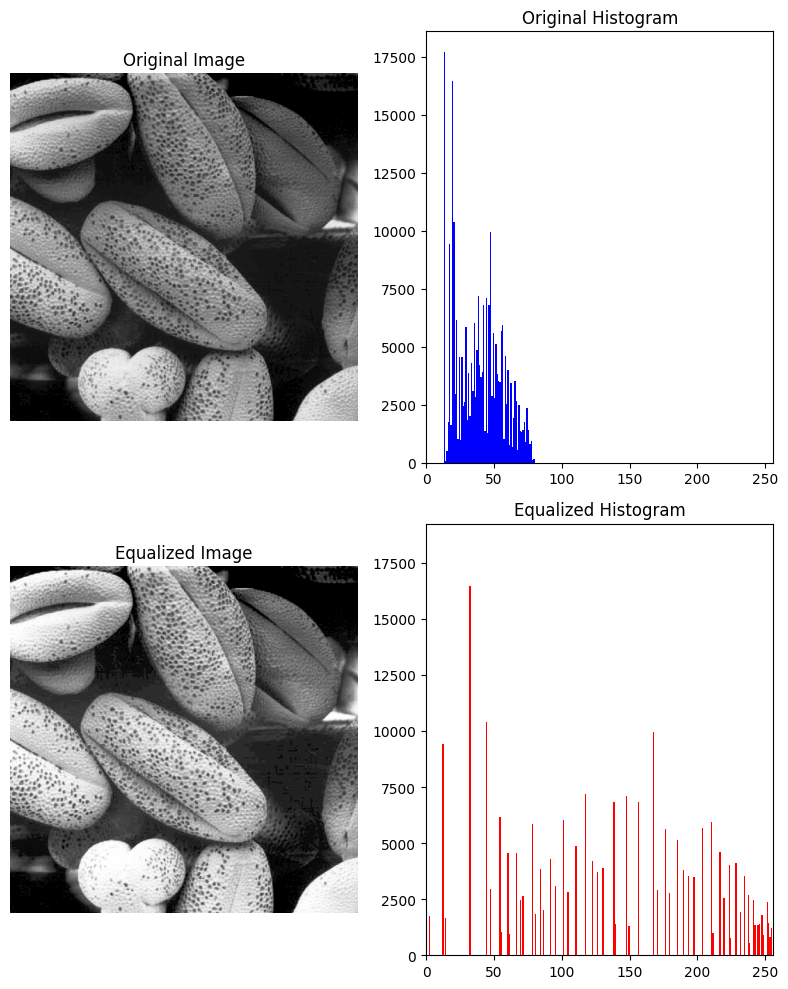

In [11]:
def histogram_equalization(image):
    # Convert image to grayscale
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    
    # Get image dimensions
    h, w = gray_image.shape
    
    # Calculate the histogram
    hist, bins = np.histogram(gray_image.flatten(), 256, [0, 256])

    # Calculate cumulative distribution function (CDF)
    cdf = hist.cumsum()
    
    # Normalize the CDF
    cdf_normalized = cdf * hist.max() / cdf.max()

    # Apply histogram equalization
    cdf_m = np.ma.masked_equal(cdf, 0)  # Mask zeros to avoid division by zero
    cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max() - cdf_m.min())  # Normalize the cdf
    cdf = np.ma.filled(cdf_m, 0).astype('uint8')  # Fill masked values with 0

    # Use the CDF to map the old pixel values to the new values
    equalized_image = cdf[gray_image]

    return gray_image, equalized_image, hist, cdf_normalized

# Load the image (replace 'image_path' with the correct path to your image)
image = cv.imread('a1images/shells.tif')

# Perform histogram equalization
gray_image, equalized_image, hist, cdf_normalized = histogram_equalization(image)

# Plot the original and equalized images
fig, ax = plt.subplots(2, 2, figsize=(8, 10))

# Display the original image and histogram
ax[0, 0].imshow(gray_image, cmap='gray')
ax[0, 0].set_title("Original Image")
ax[0, 0].axis('off')

ax[0, 1].hist(gray_image.flatten(), 256, [0, 256], color='blue')
ax[0, 1].set_title("Original Histogram")
ax[0, 1].set_xlim([0, 256])

# Display the equalized image and histogram
ax[1, 0].imshow(equalized_image, cmap='gray')
ax[1, 0].set_title("Equalized Image")
ax[1, 0].axis('off')

ax[1, 1].hist(equalized_image.flatten(), 256, [0, 256], color='red')
ax[1, 1].set_title("Equalized Histogram")
ax[1, 1].set_xlim([0, 256])

plt.tight_layout()
plt.show()